## Import Libraries

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal
%matplotlib notebook

---

## 4.1 VGG16 Model Parameters

### 1. Read image file

<IPython.core.display.Javascript object>


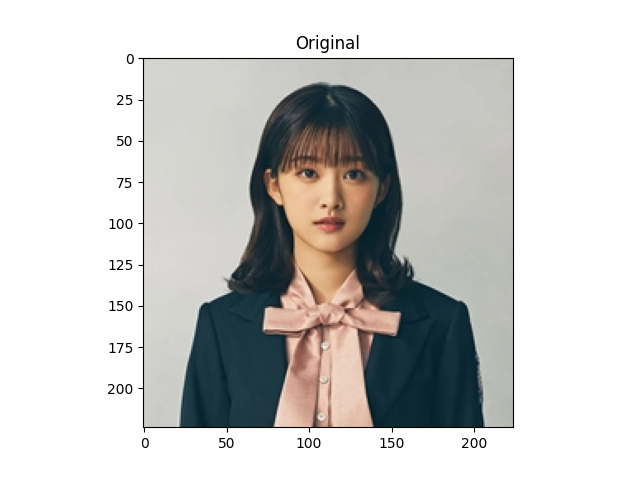

In [13]:
#Read image file
image = plt.imread('./harada.jpg')

fig = plt.figure()
rows = 1
columns = 1

fig.add_subplot(rows, columns, 1)
plt.imshow(image)
plt.title("Original")
plt.show()

### 2. Load model

In [3]:
#Load VGG16 model from tensorflow.keras
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### 3. Retrieve kernel weights from 1st convolutional layer

In [4]:
#Retrieve kernel weights from 1st convolutional layer
kernels, biases = model.layers[1].get_weights()

#View CNN layer 1 architecture
model.layers[1].get_config()

print("kernel # 0")
print('***************************************')
print('Channel # 0')
print(kernels[:,:,:,0][0])
print('Min coefficents ' + str(np.amin(kernels[:,:,:,0][0])))
print('---------------------------------------')
print('Channel # 1')
print(kernels[:,:,:,0][1])
print('Min coefficents ' + str(np.amin(kernels[:,:,:,0][1])))
print('---------------------------------------')
print('Channel # 2')
print(kernels[:,:,:,0][1])
print('Min coefficents ' + str(np.amin(kernels[:,:,:,0][2])))
print('---------------------------------------')
print('')

print("kernel # 1")
print('***************************************')
print('Channel # 0')
print(kernels[:,:,:,1][0])
print('Min coefficents ' + str(np.amin(kernels[:,:,:,1][0])))
print('---------------------------------------')
print('Channel # 1')
print(kernels[:,:,:,1][1])
print('Min coefficents ' + str(np.amin(kernels[:,:,:,0][1])))
print('---------------------------------------')
print('Channel # 2')
print(kernels[:,:,:,1][1])
print('Min coefficents ' + str(np.amin(kernels[:,:,:,0][2])))
print('---------------------------------------')

kernel # 0
***************************************
Channel # 0
[[ 0.42947057  0.55037946  0.4800154 ]
 [ 0.373467    0.44007453  0.4085474 ]
 [-0.06136011 -0.08138704 -0.06514555]]
Min coefficents -0.081387036
---------------------------------------
Channel # 1
[[ 0.27476987  0.34573907  0.31047726]
 [ 0.03868078  0.04063221  0.05020237]
 [-0.36722335 -0.4535013  -0.40338343]]
Min coefficents -0.4535013
---------------------------------------
Channel # 2
[[ 0.27476987  0.34573907  0.31047726]
 [ 0.03868078  0.04063221  0.05020237]
 [-0.36722335 -0.4535013  -0.40338343]]
Min coefficents -0.4850302
---------------------------------------

kernel # 1
***************************************
Channel # 0
[[ 0.11727387  0.02087744 -0.17269668]
 [ 0.16206263  0.04734124 -0.17037505]
 [ 0.135694    0.04185439 -0.15435153]]
Min coefficents -0.17269668
---------------------------------------
Channel # 1
[[ 0.14835016  0.03104937 -0.18760149]
 [ 0.20229845  0.06581022 -0.17757156]
 [ 0.16168842  0

### 4. Preprocessing image using keras and numpy

In [5]:
#Convert image to array
img = img_to_array(image)
img = expand_dims(img, axis=0)
img_ready = preprocess_input(img)

### 5. Extract model CNN Layer 1

In [6]:
#Extract model CNN Layer 1
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


### 6. Extract Results from CNN Layer 1

In [7]:
#Extract Results from CNN Layer 1
feature_maps = model.predict(img_ready)

#show shape of feature_maps
np.shape(feature_maps)

(1, 224, 224, 64)

### 7. Display images of feature_maps

<IPython.core.display.Javascript object>


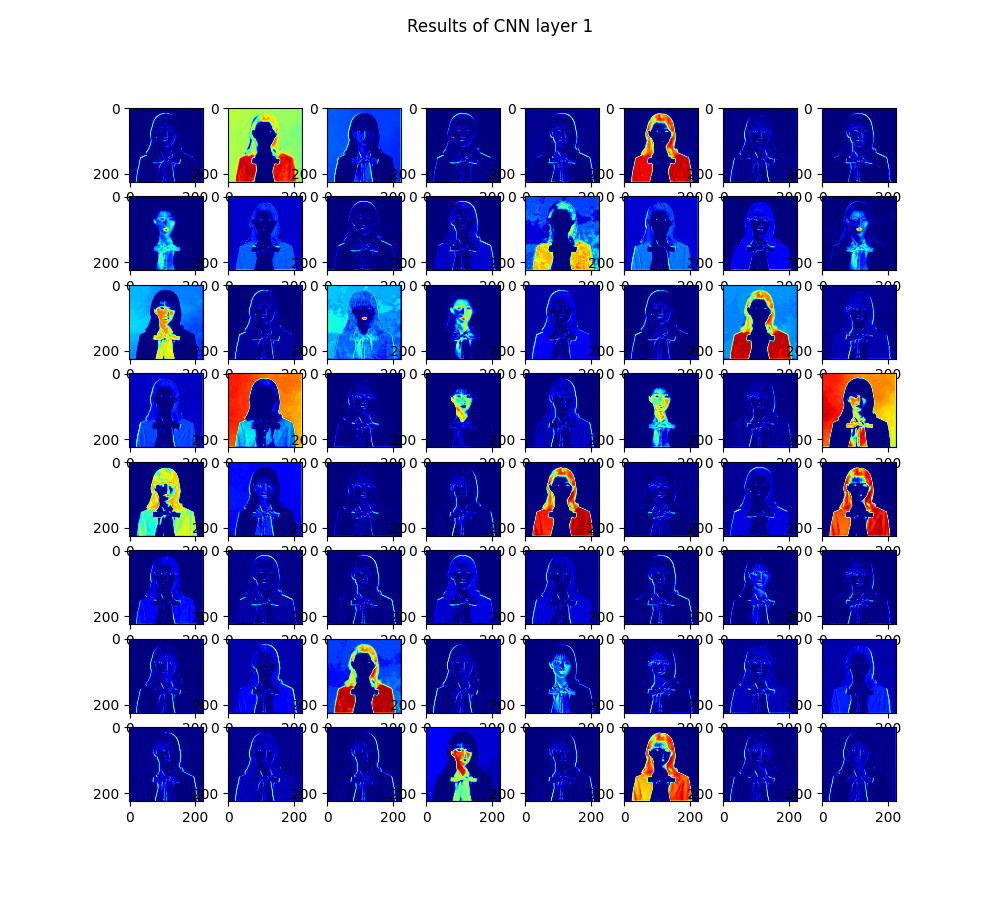

In [8]:
fig = plt.figure(figsize=(10, 9))
fig.suptitle("Results of CNN layer 1")
rows = 8
columns = 8

for i in range(64):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(feature_maps[0,:,:,i], cmap='jet')
    plt.show()

---

## 4.2 Image Preparation

### 1. Image reshape from 3D image to 4D image

In [9]:
img = plt.imread('./harada.jpg')
reshape = img.reshape(1, img.shape[0], img.shape[1], 3)

### 2. Image resize

<IPython.core.display.Javascript object>


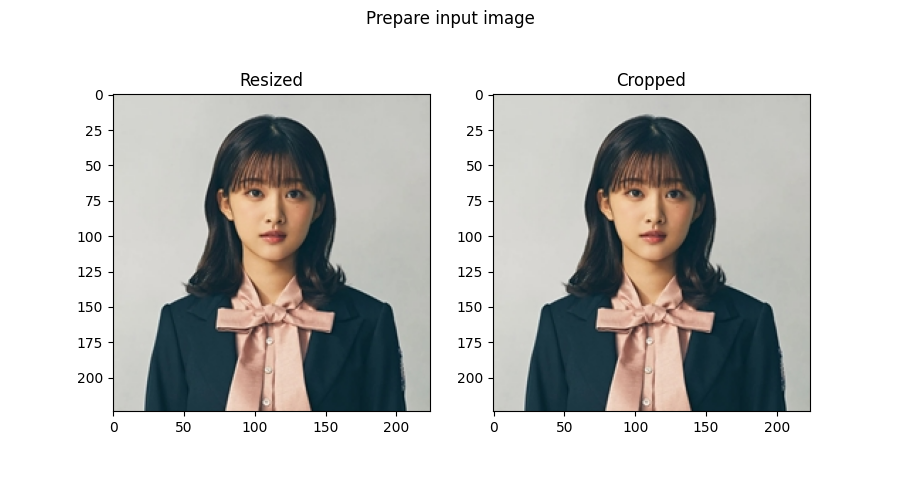

In [10]:
fig = plt.figure(figsize=(9, 5))
fig.suptitle("Prepare input image")
rows = 1
columns = 2

#Resized
r = 224 / reshape[0].shape[0]
dim = (int(reshape[0].shape[1] * r), 224)
resized = cv2.resize(reshape[0], dim)

fig.add_subplot(rows, columns, 1)
plt.imshow(resized)
plt.title('Resized')

#Cropped
cropped = resized[0:224, 0:224] 

fig.add_subplot(rows, columns, 2)
plt.imshow(cropped)
plt.title('Cropped')
plt.show()

### 3. Image subtract dataset mean of R, G, B

<IPython.core.display.Javascript object>


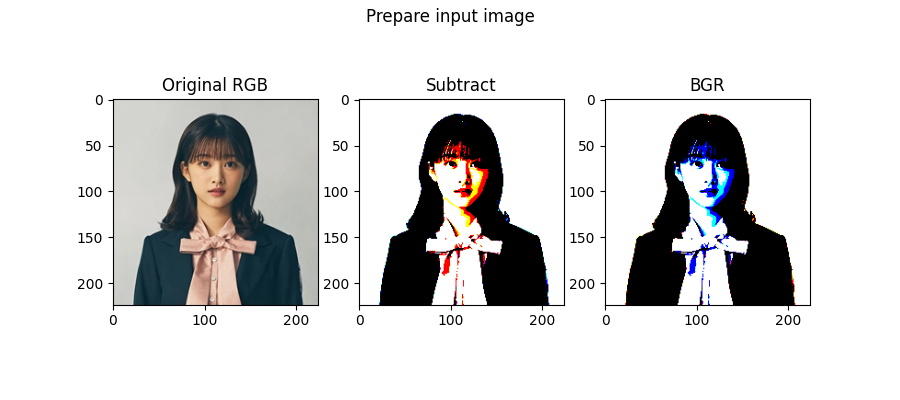

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [11]:
fig = plt.figure(figsize=(9, 4))
fig.suptitle("Prepare input image")
rows = 1
columns = 3

#Original
fig.add_subplot(rows, columns, 1)
plt.imshow(cropped)
plt.title('Original RGB')
plt.show()

#Subtract
img_mean = [123.68, 116.779, 103.939]
subtract = cropped - img_mean


fig.add_subplot(rows, columns, 2)
plt.imshow(subtract)
plt.title('Subtract')
plt.show()

#RGB => BGR
fig.add_subplot(rows, columns, 3)
bgr = cv2.cvtColor(subtract.astype('float32'), cv2.COLOR_RGB2BGR)
plt.imshow(bgr)
plt.title('BGR')
plt.show()

---

## 4.3 Conv2D()

### Operate 2D convolution and sum image

<IPython.core.display.Javascript object>


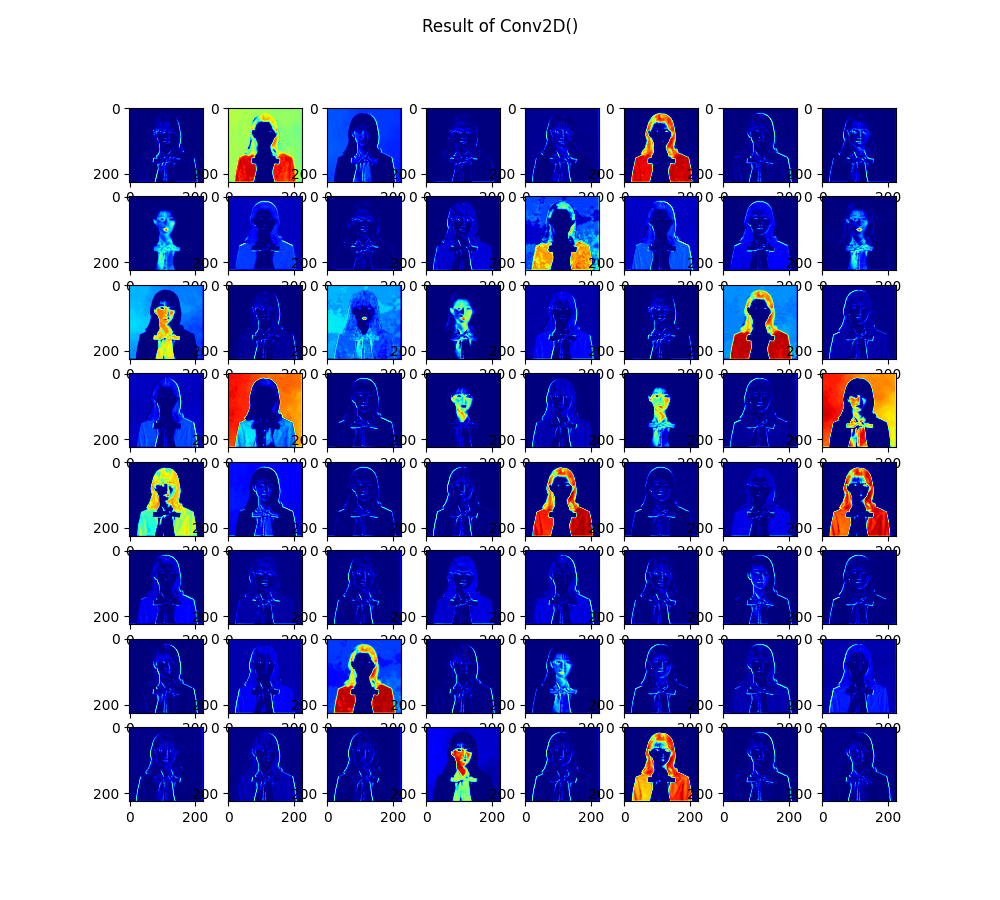

In [12]:
fig = plt.figure(figsize=(10,9))
fig.suptitle("Result of Conv2D()")
rows = 8
columns = 8

#create feature maps 4D
feature_maps = np.zeros((1, 224, 224, 64))

#For-loop 64 channels
for i in range(64):
    
    #1. Operate 2D convolution to image from 4.2
    img_result = np.zeros((224, 224, 3))
    
    img_result[:, :, 0] = signal.convolve2d(
        bgr[:, :, 0], kernels[:, :, 0, i], mode='same', boundary='fill', fillvalue=0) #B
    
    img_result[:, :, 1] = signal.convolve2d(
        bgr[:, :, 1], kernels[:, :, 1, i], mode='same', boundary='fill', fillvalue=0) #G

    img_result[:, :, 2] = signal.convolve2d(
        bgr[:, :, 2], kernels[:, :, 2, i], mode='same', boundary='fill', fillvalue=0) #R


    #2. Sum image convolutional
    img_sum = img_result[:, :, 0] + img_result[:, :, 1] + img_result[:, :, 2]


    #3. Activation function if img_sum < 0, change to 0
    img_sum = np.where(img_sum < 0, 0, img_sum)
    
    feature_maps[0, :, :, i] = img_sum
    

#4. Display image of feature_maps
for i in range(64):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(feature_maps[0,:,:,i], cmap='jet')
    plt.show()